In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import dtale
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')
# pd.set_option('display.max_rows', None)

Libraries imported


In [12]:
df = pd.read_csv('Week_District.csv')
df.head()

,STATE,SH Location,DISTRICT,DISTRICT CODE,Year-Week,agg_Weekly_Dist_DAL WSP,agg_Weekly_Dist_UT WSP,Weekly_Dist_Bill_Qty,Price_Index_Weekly_Dist
0,Bihar,BHE,ARARIA,B01,2022-15,332.0,332.0,30.00,1.000000
1,Bihar,BHE,ARARIA,B01,2022-16,362.0,362.0,18.00,1.000000
2,Bihar,BHE,ARARIA,B01,2022-17,372.0,372.0,75.50,1.000000
3,Bihar,BHE,ARARIA,B01,2022-18,372.0,372.0,0.05,1.000000
4,Bihar,BHE,ARARIA,B01,2022-19,362.0,367.0,158.00,0.986376


In [9]:
dtale.show(df)

In [ ]:
df.info()

In [62]:
# Save the DataFrame to an Excel file
df.to_excel('Week_District.xlsx', index=False)


#### District Wise Delta PI/ PI

In [13]:
p1= df.copy()

In [14]:
p1['change_PI'] = p1.groupby(['SH Location','DISTRICT CODE'],as_index=False)['Price_Index_Weekly_Dist'].diff()
p1['change_Volume'] = p1.groupby(['SH Location','DISTRICT CODE'],as_index=False)['Weekly_Dist_Bill_Qty'].diff()

In [15]:
p1['rate_of_change_PI'] = (p1['change_PI']/ p1['Price_Index_Weekly_Dist'])*100
p1['rate_of_change_Vol'] = (p1['change_Volume']/ p1['Weekly_Dist_Bill_Qty'])*100

In [16]:
p1.head()

,STATE,SH Location,DISTRICT,DISTRICT CODE,Year-Week,agg_Weekly_Dist_DAL WSP,agg_Weekly_Dist_UT WSP,Weekly_Dist_Bill_Qty,Price_Index_Weekly_Dist,change_PI,change_Volume,rate_of_change_PI,rate_of_change_Vol
0,Bihar,BHE,ARARIA,B01,2022-15,332.0,332.0,30.00,1.000000,NaN,NaN,NaN,NaN
1,Bihar,BHE,ARARIA,B01,2022-16,362.0,362.0,18.00,1.000000,0.000000,-12.00,0.000000,-66.666667
2,Bihar,BHE,ARARIA,B01,2022-17,372.0,372.0,75.50,1.000000,0.000000,57.50,0.000000,76.158940
3,Bihar,BHE,ARARIA,B01,2022-18,372.0,372.0,0.05,1.000000,0.000000,-75.45,0.000000,-150900.000000
4,Bihar,BHE,ARARIA,B01,2022-19,362.0,367.0,158.00,0.986376,-0.013624,157.95,-1.381215,99.968354


In [17]:
# Assuming your DataFrame is called 'df'
selected_columns = ['SH Location', 'DISTRICT', 'Year-Week', 'rate_of_change_Vol', 'rate_of_change_PI']
df_selected = p1[selected_columns]

In [18]:
def update_plot(sh_location, year_week):
    # Filter the DataFrame based on the selected SH Location and Year-Week
    filtered_df = df_selected[(df_selected['SH Location'] == sh_location) & (df_selected['Year-Week'] == year_week)]
    
    # Sort the filtered DataFrame by rate_of_change_PI
    sorted_df = filtered_df.sort_values('rate_of_change_PI')
    
    # Create a figure and two axes objects
    fig, ax1 = plt.subplots(figsize=(18, 10))
    
    # Plot the bar plot on the left y-axis
    ax1.bar(sorted_df['DISTRICT'], sorted_df['rate_of_change_PI'], color='#6495ED')
    ax1.set_ylabel('Delta_PI/PI (%)', color='b',fontsize=18)
    ax1.set_xlabel('District', color= 'black', fontsize=18)
    plt.xticks(rotation=45)
    for i, v in enumerate(sorted_df['rate_of_change_PI']):
        ax1.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
    # Create a twin axis object sharing the x-axis with ax1
    ax2 = ax1.twinx()
    
    # Plot the line plot on the right y-axis
    ax2.bar(sorted_df['DISTRICT'], sorted_df['rate_of_change_Vol'], color='#FF6347')
    ax2.set_ylabel('Delta_Vol/Vol (%)', color='r', fontsize=18)
    for i, v in enumerate(sorted_df['rate_of_change_Vol']):
        ax2.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontweight='bold')
    
    # # Rotate the x-axis labels for better readability
    # plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

In [19]:
from ipywidgets import interact, Dropdown

# Get unique SH Locations and Year-Weeks
sh_locations = df_selected['SH Location'].unique()
year_weeks = df_selected['Year-Week'].unique()

# Create the dropdown widgets
sh_location_dropdown = Dropdown(options=sh_locations, description='SH Location:')
year_week_dropdown = Dropdown(options=year_weeks, description='Year-Week:')

# Define a function to handle the dropdown interaction
def dropdown_handler(sh_location, year_week):
    update_plot(sh_location, year_week)

# Register the dropdown handler function with the dropdown widgets
interact(dropdown_handler, sh_location=sh_location_dropdown, year_week=year_week_dropdown)


interactive(children=(Dropdown(description='SH Location:', options=('BHE', 'BHN', 'BHS', 'JH1', 'WBC', 'WBN', …

<function __main__.dropdown_handler(sh_location, year_week)>

In [20]:
sh_location_dropdown
year_week_dropdown


Dropdown(description='Year-Week:', options=('2022-15', '2022-16', '2022-17', '2022-18', '2022-19', '2022-23', …

### Zone

In [21]:
z1 = df.groupby(['SH Location','Year-Week'], as_index=False).apply(lambda group: pd.Series({
    'Z_Weekly_dist_DAL WSP': ((group['agg_Weekly_Dist_DAL WSP'] * group['Weekly_Dist_Bill_Qty']).sum()) / group['Weekly_Dist_Bill_Qty'].sum(),
    'Z_Weekly_Dist_Bill Qty': group['Weekly_Dist_Bill_Qty'].sum()
}))
z2 = df.groupby(['SH Location','Year-Week'], as_index=False).apply(lambda group: pd.Series({
    'Z_Weekly_dist_UT WSP': ((group['agg_Weekly_Dist_UT WSP'] * group['Weekly_Dist_Bill_Qty']).sum()) / group['Weekly_Dist_Bill_Qty'].sum(),
    'Z_Weekly_Dist_Bill Qty': group['Weekly_Dist_Bill_Qty'].sum()
}))

In [22]:
z3=pd.merge(z1,z2, how='inner',left_on=['SH Location','Year-Week'],right_on=['SH Location','Year-Week'])

In [23]:
z3.head()

,SH Location,Year-Week,Z_Weekly_dist_DAL WSP,Z_Weekly_Dist_Bill Qty_x,Z_Weekly_dist_UT WSP,Z_Weekly_Dist_Bill Qty_y
0,BHE,2022-14,340.094198,1029.75,334.360524,1029.75
1,BHE,2022-15,338.348947,1377.00,337.122004,1377.00
2,BHE,2022-16,359.022881,480.75,358.412376,480.75
3,BHE,2022-17,372.123229,811.50,371.057301,811.50
4,BHE,2022-18,372.216410,808.65,375.081679,808.65


In [24]:
z3['Price_Index']= z3['Z_Weekly_dist_DAL WSP']/z3['Z_Weekly_dist_UT WSP']

In [25]:
z3['Change_in_Price_Index'] = z3.groupby(['SH Location'], as_index=False)['Price_Index'].diff()

In [26]:
z3.head()

,SH Location,Year-Week,Z_Weekly_dist_DAL WSP,Z_Weekly_Dist_Bill Qty_x,Z_Weekly_dist_UT WSP,Z_Weekly_Dist_Bill Qty_y,Price_Index,Change_in_Price_Index
0,BHE,2022-14,340.094198,1029.75,334.360524,1029.75,1.017148,NaN
1,BHE,2022-15,338.348947,1377.00,337.122004,1377.00,1.003639,-0.013509
2,BHE,2022-16,359.022881,480.75,358.412376,480.75,1.001703,-0.001936
3,BHE,2022-17,372.123229,811.50,371.057301,811.50,1.002873,0.001169
4,BHE,2022-18,372.216410,808.65,375.081679,808.65,0.992361,-0.010512


In [27]:
from pivottablejs import pivot_ui
pivot_ui(z3)

In [28]:
z3['Price_Index'] = z3['Price_Index'].round(3)
z3['Change_in_Price_Index'] = (z3['Change_in_Price_Index']/z3['Price_Index'])*100
z3['Change_in_Price_Index'] =z3['Change_in_Price_Index'].round(2)

In [29]:
z3.to_csv('Week_Zone_PI.csv', index=False)

### Speedometer for National

In [30]:
g1 = df.groupby(['Year-Week'], as_index=False).apply(lambda group: pd.Series({
    'N_Weekly_dist_DAL WSP': ((group['agg_Weekly_Dist_DAL WSP'] * group['Weekly_Dist_Bill_Qty']).sum()) / group['Weekly_Dist_Bill_Qty'].sum(),
    'N_Weekly_Dist_Bill Qty': group['Weekly_Dist_Bill_Qty'].sum()
}))
g2 = df.groupby(['Year-Week'], as_index=False).apply(lambda group: pd.Series({
    'N_Weekly_dist_UT WSP': ((group['agg_Weekly_Dist_UT WSP'] * group['Weekly_Dist_Bill_Qty']).sum()) / group['Weekly_Dist_Bill_Qty'].sum(),
    'N_Weekly_Dist_Bill Qty': group['Weekly_Dist_Bill_Qty'].sum()
}))

In [31]:
g3=pd.merge(g1,g2, how='inner',left_on=['Year-Week'],right_on=['Year-Week'])

In [32]:
g3.head()

,Year-Week,N_Weekly_dist_DAL WSP,N_Weekly_Dist_Bill Qty_x,N_Weekly_dist_UT WSP,N_Weekly_Dist_Bill Qty_y
0,2022-14,340.697585,5690.35,336.754681,5690.35
1,2022-15,343.114392,4568.95,346.286674,4568.95
2,2022-16,360.555910,2990.50,359.919194,2990.50
3,2022-17,368.776728,3762.90,370.447447,3762.90
4,2022-18,370.663164,2760.10,370.188870,2760.10


In [33]:
g3['N_Price_Index_Weekly']= g3['N_Weekly_dist_DAL WSP']/g3['N_Weekly_dist_UT WSP']

In [34]:
g3['N_Price_Index_Weekly_Change'] =  g3['N_Price_Index_Weekly'].diff()
g3['N_Price_Index_Weekly_Change'] = (g3['N_Price_Index_Weekly_Change']/g3['N_Price_Index_Weekly'])*100

In [35]:
g3.head()

,Year-Week,N_Weekly_dist_DAL WSP,N_Weekly_Dist_Bill Qty_x,N_Weekly_dist_UT WSP,N_Weekly_Dist_Bill Qty_y,N_Price_Index_Weekly,N_Price_Index_Weekly_Change
0,2022-14,340.697585,5690.35,336.754681,5690.35,1.011709,NaN
1,2022-15,343.114392,4568.95,346.286674,4568.95,0.990839,-2.106234
2,2022-16,360.555910,2990.50,359.919194,2990.50,1.001769,1.091061
3,2022-17,368.776728,3762.90,370.447447,3762.90,0.995490,-0.630750
4,2022-18,370.663164,2760.10,370.188870,2760.10,1.001281,0.578382


In [36]:
g3.shape

(44, 7)

In [37]:
# Generate random percentages between 0 and 100
random_percentages = np.random.uniform(40, 41, size=44)

# Assign the random percentages to a new column in the dataframe
g3['Share_of_wallet'] = random_percentages
g3['Share_of_wallet_Change'] =  (g3['Share_of_wallet'].diff()/g3['Share_of_wallet'])*100

In [38]:
g3.head()

,Year-Week,N_Weekly_dist_DAL WSP,N_Weekly_Dist_Bill Qty_x,N_Weekly_dist_UT WSP,N_Weekly_Dist_Bill Qty_y,N_Price_Index_Weekly,N_Price_Index_Weekly_Change,Share_of_wallet,Share_of_wallet_Change
0,2022-14,340.697585,5690.35,336.754681,5690.35,1.011709,NaN,40.057258,NaN
1,2022-15,343.114392,4568.95,346.286674,4568.95,0.990839,-2.106234,40.956491,2.195580
2,2022-16,360.555910,2990.50,359.919194,2990.50,1.001769,1.091061,40.497166,-1.134213
3,2022-17,368.776728,3762.90,370.447447,3762.90,0.995490,-0.630750,40.958206,1.125634
4,2022-18,370.663164,2760.10,370.188870,2760.10,1.001281,0.578382,40.917386,-0.099763


In [39]:
# Save the DataFrame to an Excel file
g3.to_csv('Weekly_PI.csv', index=False)

Text(601604.76, 0, 'Total Volume = 601604.76')

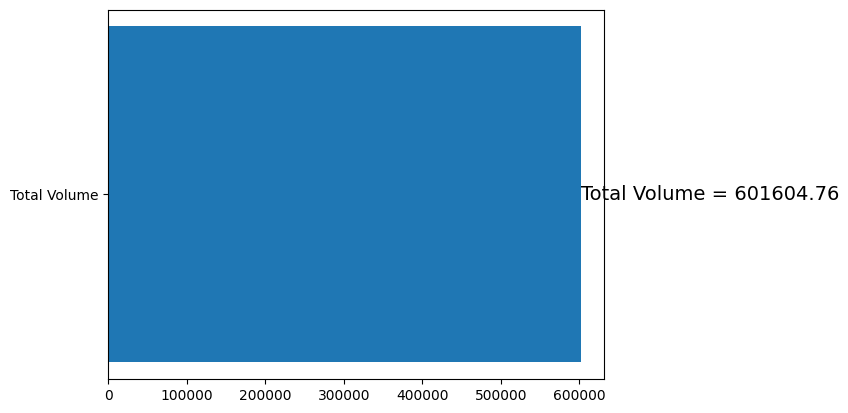

In [40]:
total_sales = g3['N_Weekly_Dist_Bill Qty_y'].sum()

# Create a bar plot for total sales
plt.barh('Total Volume', total_sales)

# Add the total volume value inside the bar
plt.text(total_sales, 0, f"Total Volume = {total_sales}", ha='left', va='center', fontsize=14)

In [41]:
from pivottablejs import pivot_ui
pivot_ui(g3)

In [42]:
correlation = g3['N_Price_Index_Weekly'].corr(g3['N_Weekly_Dist_Bill Qty_x'])
correlation

0.11060381860338624

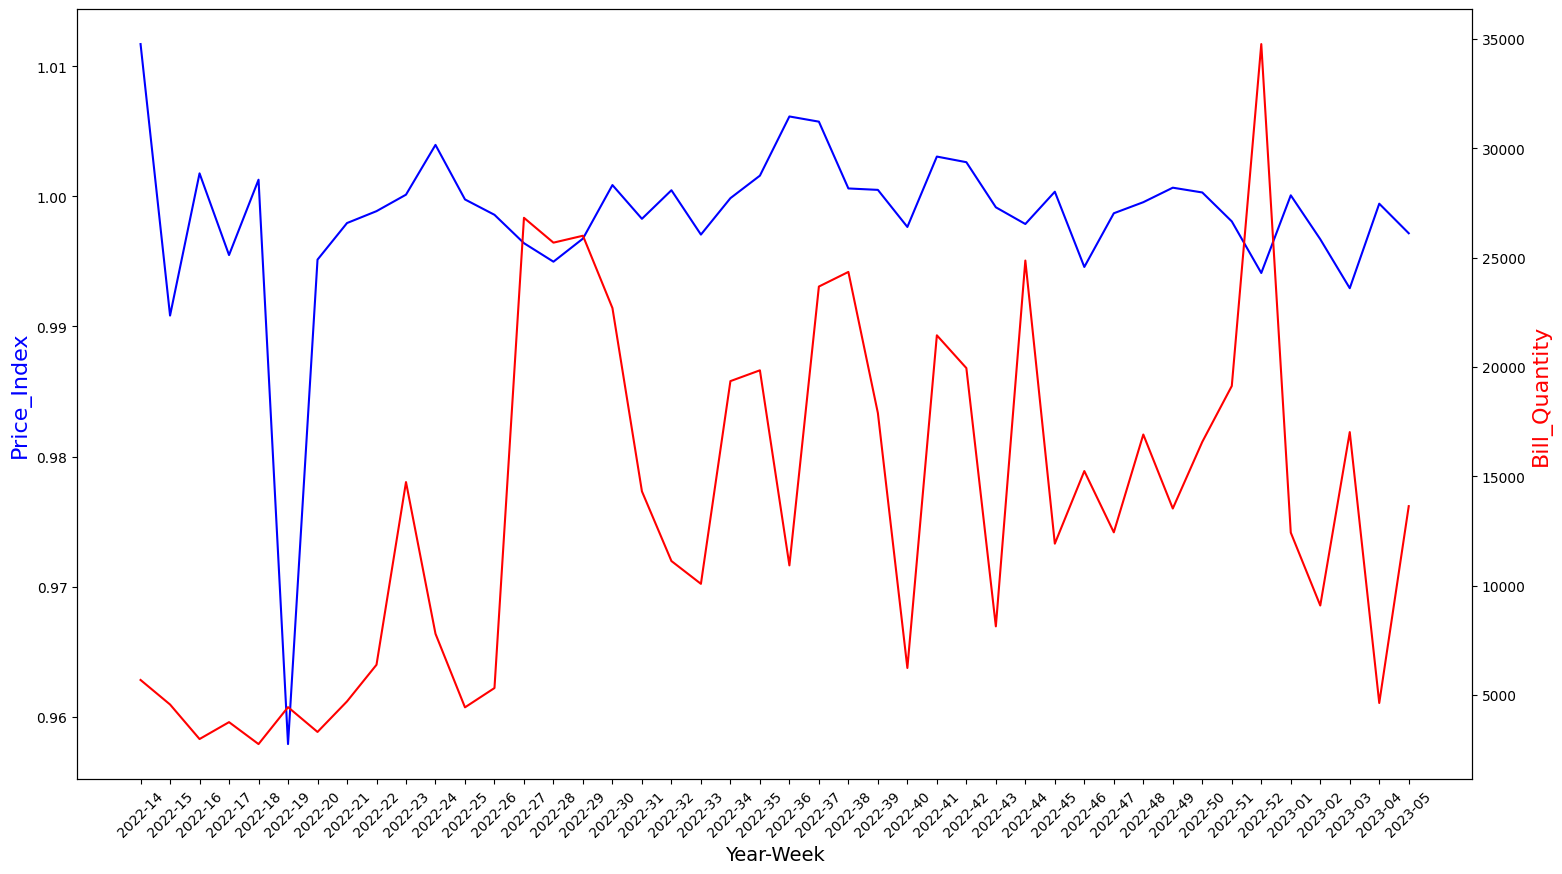

In [43]:
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.xticks(rotation=45)
# Plot the Price_Index on the left y-axis
ax1.plot(g3['Year-Week'], g3['N_Price_Index_Weekly'], color='blue')
ax1.set_ylabel('Price_Index', color='blue', fontsize=16)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the Bill_Quantity on the right y-axis
ax2.plot(g3['Year-Week'], g3['N_Weekly_Dist_Bill Qty_x'], color='red')
ax2.set_ylabel('Bill_Quantity', color='red', fontsize=16)

# Set labels and title
ax1.set_xlabel('Year-Week', fontsize=14)
# plt.title('Price Index and Bill Quantity')

# plt.xticks(rotation=45)

# Display the plot
plt.show()

In [44]:
g3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year-Week                    44 non-null     object 
 1   N_Weekly_dist_DAL WSP        44 non-null     float64
 2   N_Weekly_Dist_Bill Qty_x     44 non-null     float64
 3   N_Weekly_dist_UT WSP         44 non-null     float64
 4   N_Weekly_Dist_Bill Qty_y     44 non-null     float64
 5   N_Price_Index_Weekly         44 non-null     float64
 6   N_Price_Index_Weekly_Change  43 non-null     float64
 7   Share_of_wallet              44 non-null     float64
 8   Share_of_wallet_Change       43 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.2+ KB


In [45]:
g3['N_Price_Index_Weekly_Moving_Average'] = g3['N_Price_Index_Weekly'].rolling(window=3, min_periods=1).mean()
g3['N_Weekly_Dist_Bill Qty_Moving_Average'] = g3['N_Weekly_Dist_Bill Qty_x'].rolling(window=3, min_periods=1).mean()

In [46]:
g3['N_Price_Index_Weekly_Moving_Average_1'] = g3['N_Price_Index_Weekly_Moving_Average'].rolling(window=3, min_periods=1).mean()
g3['N_Weekly_Dist_Bill Qty_Moving_Average_1'] = g3['N_Weekly_Dist_Bill Qty_Moving_Average'].rolling(window=3, min_periods=1).mean()

In [47]:
correlation = g3['N_Price_Index_Weekly_Moving_Average_1'].corr(g3['N_Weekly_Dist_Bill Qty_Moving_Average_1'])
correlation

0.19503182438947061

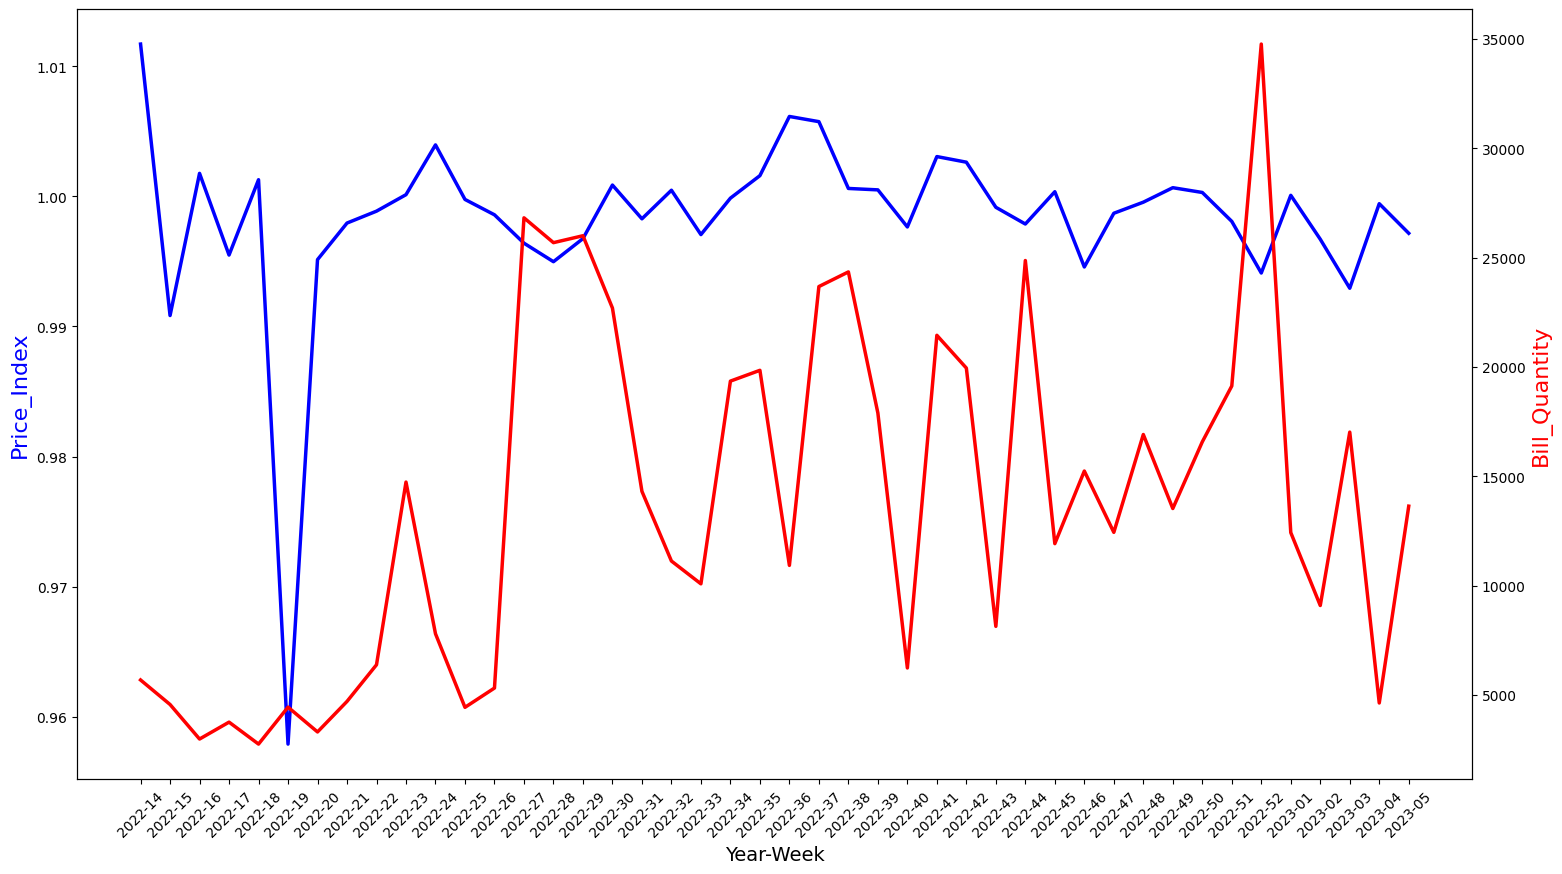

In [48]:
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.xticks(rotation=45)

# Plot the Price_Index on the left y-axis with thicker line
ax1.plot(g3['Year-Week'], g3['N_Price_Index_Weekly'], color='blue', linewidth=2.5)
ax1.set_ylabel('Price_Index', color='blue', fontsize=16)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the Bill_Quantity on the right y-axis with thicker line
ax2.plot(g3['Year-Week'], g3['N_Weekly_Dist_Bill Qty_x'], color='red', linewidth=2.5)
ax2.set_ylabel('Bill_Quantity', color='red', fontsize=16)

# Set labels and title
ax1.set_xlabel('Year-Week', fontsize=14)

# Display the plot
plt.show()


In [49]:
correlation = g3['N_Price_Index_Weekly'].corr(g3['N_Weekly_Dist_Bill Qty_Moving_Average'])
correlation

0.20036322489528943

In [50]:
d3 = g3.loc[g3['Year-Week'] >= '2022-20' ]

In [51]:
correlation = d3['N_Price_Index_Weekly_Moving_Average_1'].corr(d3['N_Weekly_Dist_Bill Qty_Moving_Average_1'])
correlation

0.563666765879667

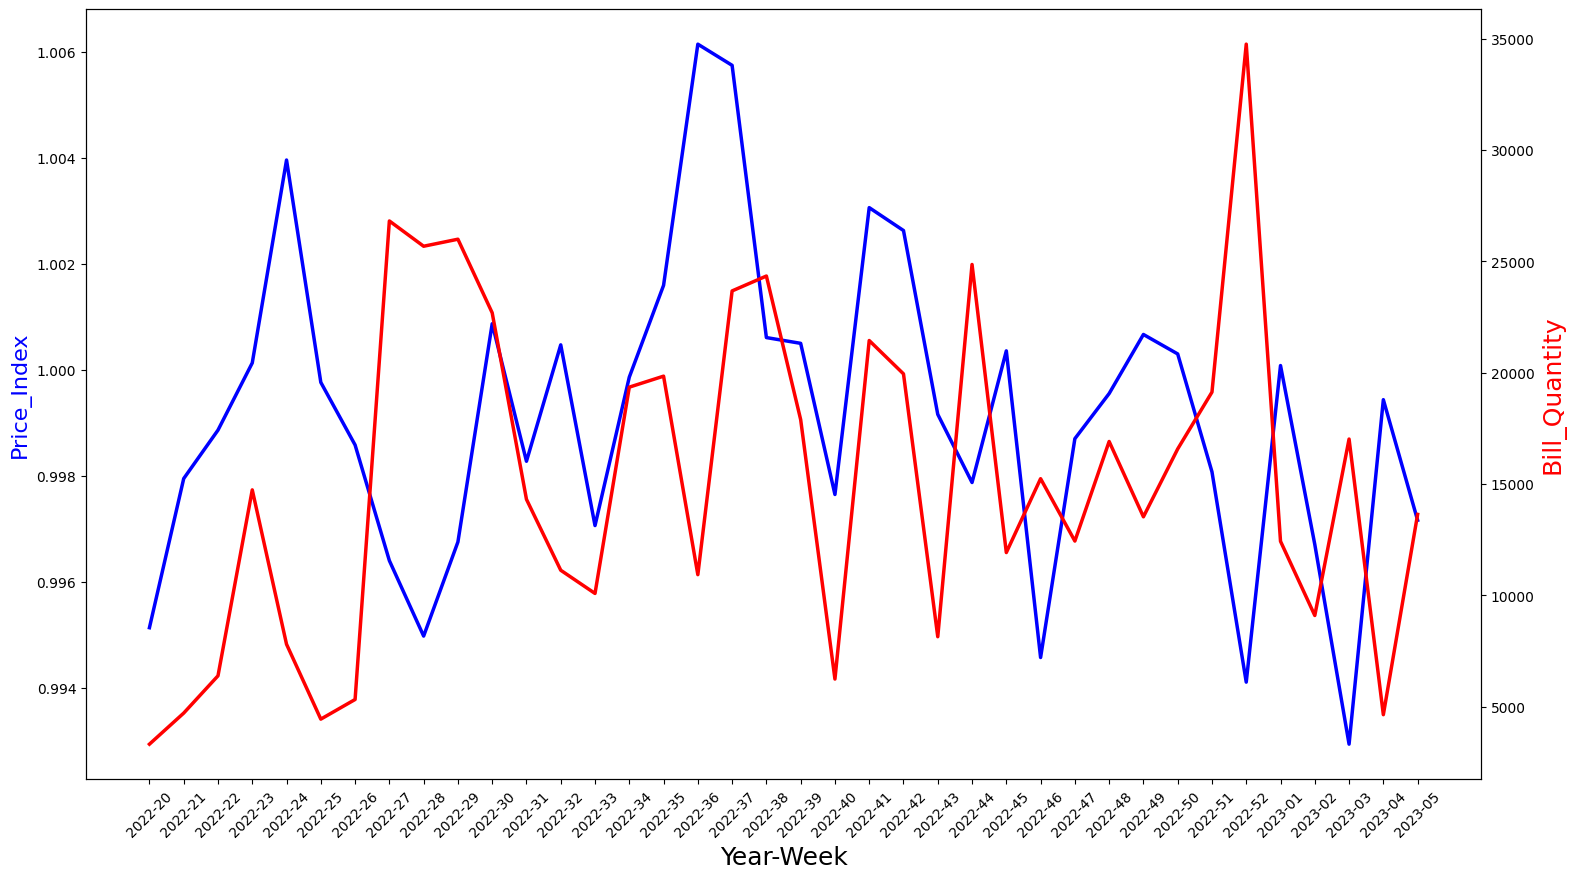

In [52]:
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.xticks(rotation=45)
# Plot the Price_Index on the left y-axis
ax1.plot(d3['Year-Week'], d3['N_Price_Index_Weekly'], color='blue', linewidth=2.5)
ax1.set_ylabel('Price_Index', color='blue', fontsize=16)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the Bill_Quantity on the right y-axis
ax2.plot(d3['Year-Week'], d3['N_Weekly_Dist_Bill Qty_x'], color='red', linewidth=2.5)
ax2.set_ylabel('Bill_Quantity', color='red', fontsize=18)

# Set labels and title
ax1.set_xlabel('Year-Week', fontsize=18)
# plt.title('Price Index and Bill Quantity')

# plt.xticks(rotation=45)

# Display the plot
plt.show()

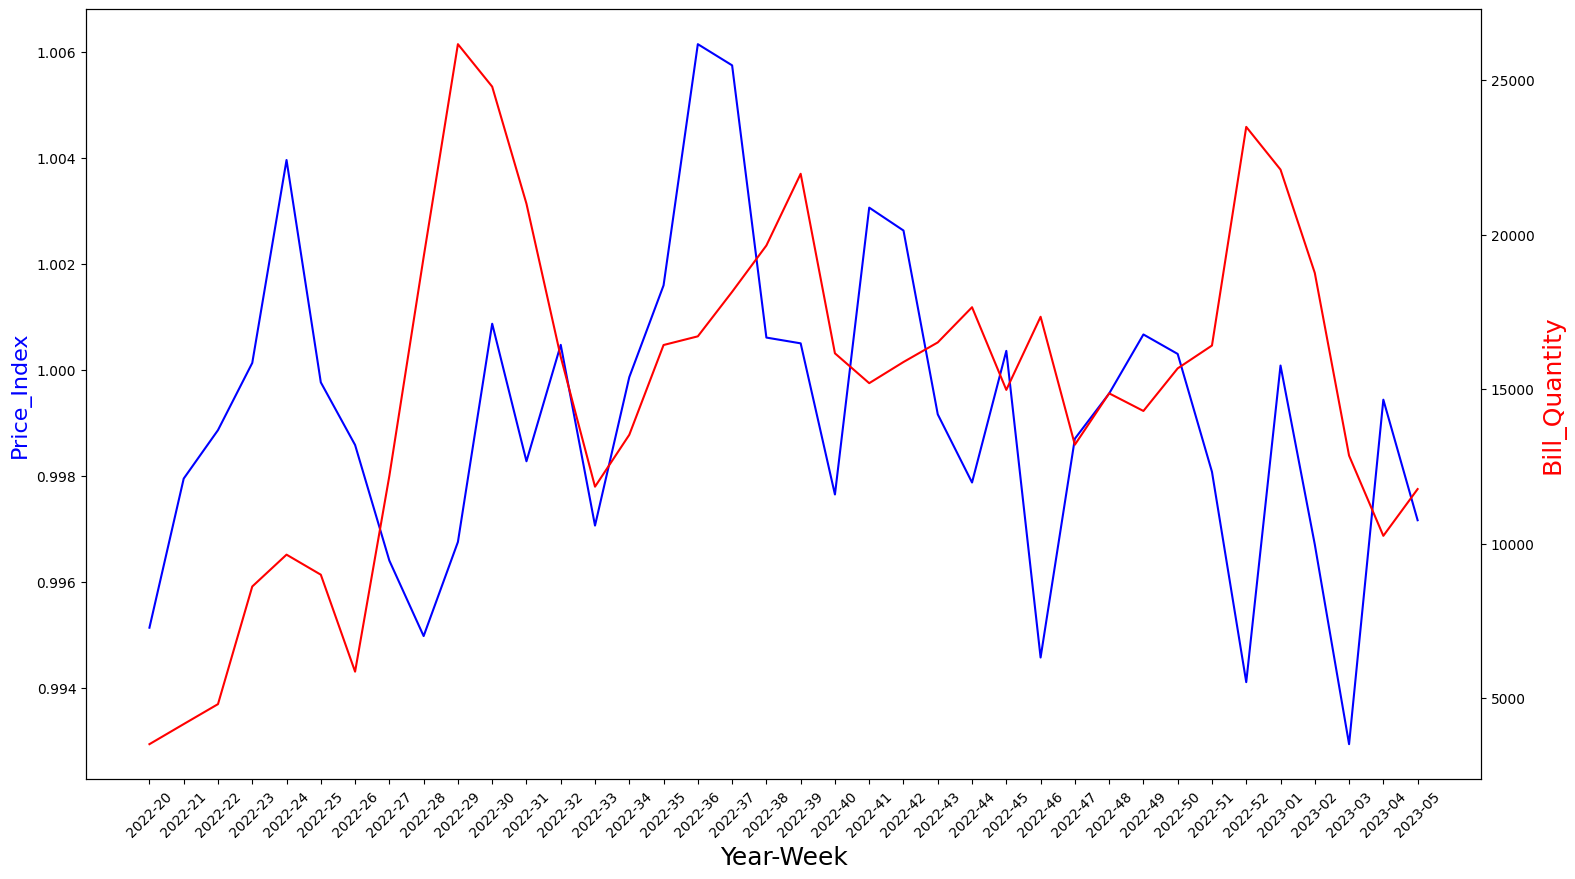

In [53]:
fig, ax1 = plt.subplots(figsize=(18, 10))
plt.xticks(rotation=45)
# Plot the Price_Index on the left y-axis
ax1.plot(d3['Year-Week'], d3['N_Price_Index_Weekly'], color='blue')
ax1.set_ylabel('Price_Index', color='blue', fontsize=16)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the Bill_Quantity on the right y-axis
ax2.plot(d3['Year-Week'], d3['N_Weekly_Dist_Bill Qty_Moving_Average'], color='red')
ax2.set_ylabel('Bill_Quantity', color='red', fontsize=18)

# Set labels and title
ax1.set_xlabel('Year-Week', fontsize=18)
# plt.title('Price Index and Bill Quantity')

# plt.xticks(rotation=45)

# Display the plot
plt.show()

In [54]:
correlation = d3['N_Price_Index_Weekly'].corr(d3['N_Weekly_Dist_Bill Qty_x'])
correlation

-0.07528483140867427

In [55]:
d3.head()

,Year-Week,N_Weekly_dist_DAL WSP,N_Weekly_Dist_Bill Qty_x,N_Weekly_dist_UT WSP,N_Weekly_Dist_Bill Qty_y,N_Price_Index_Weekly,N_Price_Index_Weekly_Change,Share_of_wallet,Share_of_wallet_Change,N_Price_Index_Weekly_Moving_Average,N_Weekly_Dist_Bill Qty_Moving_Average,N_Price_Index_Weekly_Moving_Average_1,N_Weekly_Dist_Bill Qty_Moving_Average_1
6,2022-20,369.555049,3314.75,371.361113,3314.75,0.995137,3.742385,40.651982,-0.612237,0.984771,3507.666667,0.989724,3445.294444
7,2022-21,366.273402,4710.65,367.026005,4710.65,0.997949,0.281860,40.471941,-0.444854,0.983660,4157.850000,0.984440,3774.188889
8,2022-22,359.869119,6385.20,360.278558,6385.20,0.998864,0.091513,40.266387,-0.510485,0.997317,4803.533333,0.988583,4156.350000
9,2022-23,357.988281,14736.70,357.941364,14736.70,1.000131,0.126736,40.628747,0.891882,0.998981,8610.850000,0.993319,5857.411111
10,2022-24,353.435351,7802.55,352.041839,7802.55,1.003958,0.381221,40.857218,0.559193,1.000984,9641.483333,0.999094,7685.288889


### With Lag

In [56]:
d3['N_Price_Index_2_lags_Weekly'] = d3['N_Price_Index_Weekly'].shift(1)

In [57]:
d3.head()

,Year-Week,N_Weekly_dist_DAL WSP,N_Weekly_Dist_Bill Qty_x,N_Weekly_dist_UT WSP,N_Weekly_Dist_Bill Qty_y,N_Price_Index_Weekly,N_Price_Index_Weekly_Change,Share_of_wallet,Share_of_wallet_Change,N_Price_Index_Weekly_Moving_Average,N_Weekly_Dist_Bill Qty_Moving_Average,N_Price_Index_Weekly_Moving_Average_1,N_Weekly_Dist_Bill Qty_Moving_Average_1,N_Price_Index_2_lags_Weekly
6,2022-20,369.555049,3314.75,371.361113,3314.75,0.995137,3.742385,40.651982,-0.612237,0.984771,3507.666667,0.989724,3445.294444,NaN
7,2022-21,366.273402,4710.65,367.026005,4710.65,0.997949,0.281860,40.471941,-0.444854,0.983660,4157.850000,0.984440,3774.188889,0.995137
8,2022-22,359.869119,6385.20,360.278558,6385.20,0.998864,0.091513,40.266387,-0.510485,0.997317,4803.533333,0.988583,4156.350000,0.997949
9,2022-23,357.988281,14736.70,357.941364,14736.70,1.000131,0.126736,40.628747,0.891882,0.998981,8610.850000,0.993319,5857.411111,0.998864
10,2022-24,353.435351,7802.55,352.041839,7802.55,1.003958,0.381221,40.857218,0.559193,1.000984,9641.483333,0.999094,7685.288889,1.000131


In [58]:
correlation = d3['N_Price_Index_2_lags_Weekly'].corr(d3['N_Weekly_Dist_Bill Qty_x'])
correlation

0.04361496596485564

In [59]:
!pip install pyecharts

In [60]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Gauge


# Create a Gauge chart
gauge_chart = (
    Gauge()
    .add(
        "Price Index",
        [("", g3['N_Price_Index_Weekly'][0])],
        axisline_opts=opts.AxisLineOpts(
            linestyle_opts=opts.LineStyleOpts(width=30, color=[(0.3, "#67e0e3"), (0.7, "#37a2da"), (1, "#fd666d")])),
        detail_label_opts=opts.LabelOpts(formatter="{value}"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Price Index Gauge Chart"),
        legend_opts=opts.LegendOpts(is_show=False),
    )
)

# Render the chart in Jupyter Notebook
gauge_chart.render_notebook()




TraitError: The 'children' trait of a VBox instance contains an Instance of a TypedTuple which expected a Widget, not the FigureCanvasAgg at '0x146825ef4f0'.

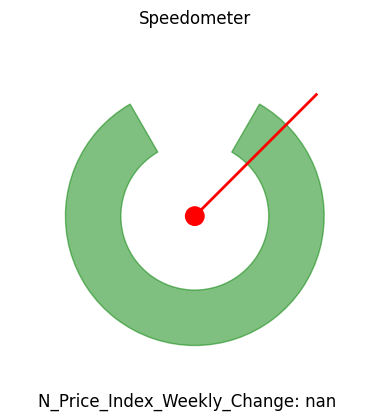

In [61]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import pandas as pd
import ipywidgets as widgets
# Initialize variables for selected index and value
selected_index = 0
selected_value = g3['N_Price_Index_Weekly'].values[selected_index]
selected_change = g3['N_Price_Index_Weekly_Change'].values[selected_index]

# Function to update the plot based on the selected dropdown value
def update_plot(index):
    global selected_index, selected_value, selected_change
    selected_index = index
    selected_value = g3['N_Price_Index_Weekly'].values[selected_index]
    selected_change = g3['N_Price_Index_Weekly_Change'].values[selected_index]
    ax.clear()
    plot_speedometer(ax, selected_value)
    plt.figtext(0.5, 0.1, f'N_Price_Index_Weekly_Change: {selected_change}', fontsize=12, ha='center')

def plot_speedometer(ax, value):
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    circle = plt.Circle((0, 0), 0.7, color='white', edgecolor='black', linewidth=2)
    ax.add_artist(circle)
    arc = Wedge((0, 0), 0.7, 120, 420, width=0.3, color='green', alpha=0.5)
    ax.add_artist(arc)
    needle = plt.Line2D([0, 0.65 * value],
                        [0, 0.65 * value],
                        linewidth=2, color='red')
    ax.add_artist(needle)
    dot = plt.Circle((0, 0), 0.05, color='red')
    ax.add_artist(dot)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title('Speedometer')

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the initial speedometer
plot_speedometer(ax, selected_value)
plt.figtext(0.5, 0.1, f'N_Price_Index_Weekly_Change: {selected_change}', fontsize=12, ha='center')

# Create the dropdown menu
week_year_options = g3['Year-Week'].tolist()
dropdown = widgets.Dropdown(options=week_year_options, value=week_year_options[selected_index], description='Year-Week')


# Update the plot when the dropdown value changes
def dropdown_event_handler(change):
    selected_index = week_year_options.index(change.new)
    update_plot(selected_index)

dropdown.observe(dropdown_event_handler, names='value')

# Display the dropdown and plot
display(widgets.VBox([dropdown, fig.canvas]))

# # Display the dropdown and plot
# widgets.VBox([dropdown, fig.canvas])


In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Create a Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Price Index Speedometer"),
    html.Div([
        html.Label("Select Week-Year:"),
        dcc.Dropdown(
            id='week-year-dropdown',
            options=[{'label': str(week_year), 'value': week_year} for week_year in g3['Year-Week'].unique()],
            value=df['Year-Week'].unique()[0]
        )
    ]),
    html.Div([
        dcc.Graph(id='speedometer-graph')
    ]),
    html.Div(id='N_Price_Index_Weekly_Change')
])

# Callback function to update the speedometer graph
@app.callback(
    Output('speedometer-graph', 'figure'),
    Output('N_Price_Index_Weekly_Change', 'children'),
    Input('week-year-dropdown', 'value')
)
def update_speedometer(week_year):
    # Filter the dataframe based on the selected week-year
    selected_df = g3[g3['Year-Week'] == week_year]
    
    # Get the price index and price index change values
    price_index = selected_df['N_Price_Index_Weekly'].values[0]
    price_index_change = selected_df['N_Price_Index_Weekly_Change'].values[0]
    
    # Create a speedometer plot
    fig = go.Figure(go.Indicator(
        mode='gauge+number',
        value=price_index,
        title={'text': "Price Index"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ))
    
    # Customize the appearance of the speedometer
    fig.update_traces(
        gauge={'axis': {'range': [None, 100]}},
        number={'suffix': '%'}
    )
    
    # Format the price index change value
    price_index_change_text = f"N_Price_Index_Weekly_Change: {price_index_change}"
    
    return fig, price_index_change_text

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
g3.to_csv('Week_Index.csv', index=False)

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set the plot range
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Draw the speedometer circle
circle = plt.Circle((0, 0), 0.7, color='white', edgecolor='black', linewidth=2)
ax.add_artist(circle)

# Draw the filled portion of the speedometer
arc = plt.Wedge((0, 0), 0.7, 120, 420, width=0.3, color='green', alpha=0.5)
ax.add_artist(arc)

# Draw the needle
needle = plt.Line2D([0, 0.65 * np.cos(np.radians(val - 90))],
                    [0, 0.65 * np.sin(np.radians(val - 90))],
                    linewidth=2, color='red')
ax.add_artist(needle)

# Add a center dot
dot = plt.Circle((0, 0), 0.05, color='red')
ax.add_artist(dot)

# Set the aspect ratio to equal
ax.set_aspect('equal')

# Remove the axis labels
ax.axis('off')

# Set the plot title
plt.title('Speedometer')

# Display the plot
plt.show()


In [ ]:
df['Dist_Code'] = df['DISTRICT']+ '_' + df['DISTRICT CODE']

In [ ]:
df.info()

In [ ]:
df.nunique(axis=0)

In [ ]:
selected_columns = ['STATE', 'Dist_Code', 'Year-Week', 'Price_Index_Weekly_Dist', 'Weekly_Dist_Bill_Qty']
df1 = df[selected_columns].copy()

In [ ]:
df1.head()

## Bihar

### Feature Engineering

In [ ]:
df2 = df1[(df1['STATE'] == 'Bihar')]

In [ ]:
year_week_set = set(df2['Year-Week'])

In [ ]:
for dist_code in df2['Dist_Code'].unique():
    df2[f'Dummy_{dist_code}'] = df2['Year-Week'].apply(lambda x: int(x in year_week_set and df2.loc[df2['Dist_Code'] == dist_code, 'Year-Week'].str.contains(x).any()))

In [ ]:
df2['Total_Dist_Code_1'] = df2.filter(like='Dummy_').eq(1).sum(axis=1)
df2['Total_Dist_Code_0'] = df2.filter(like='Dummy_').eq(0).sum(axis=1)
df2['Ratio_1_0']= df2['Total_Dist_Code_1']/df2['Total_Dist_Code_0'] 

In [ ]:
df2.nunique(axis=0)

In [ ]:
df2.head()

In [ ]:
# df2.to_csv('Dummy_Check.csv', index=False)

In [ ]:
df2.shape

In [ ]:
df2['Dist_Code'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))  # Adjust the values as per your desired size

# Plot the scatter plot
sns.scatterplot(data=df2, x='Weekly_Dist_Bill_Qty', y='Price_Index_Weekly_Dist', hue='Dist_Code')

# Set plot title and labels
plt.title("Price Index vs. Bill Quantity for Each Dist on Weekly Basis")
plt.xlabel("Bill Quantity")
plt.ylabel("Price Index")

# Display the plot
plt.show()


In [ ]:
df2 = df2[(df2['Price_Index_Weekly_Dist'] > 0.8) & (df2['Price_Index_Weekly_Dist'] < 1.2)]

### Feature Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2['Price_Index_Weekly_Dist_normalized'] = scaler.fit_transform(df2[['Price_Index_Weekly_Dist']])
df2['Total_Dist_Code_1_normalized'] = scaler.fit_transform(df2[['Total_Dist_Code_1']])
df2['Total_Dist_Code_0_normalized'] = scaler.fit_transform(df2[['Total_Dist_Code_0']])
df2['Ratio_1_0_normalized'] = scaler.fit_transform(df2[['Ratio_1_0']])

### Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from math import sqrt

#### Modelling District Wise in Bihar

In [ ]:
#X = df2[['Price_Index_Weekly_Dist_normalized'] + ['Total_Dist_Code_1_normalized'] + ['Total_Dist_Code_0_normalized'] + ['Ratio_1_0_normalized'] ]
X = df2[['Price_Index_Weekly_Dist_normalized'] + ['Total_Dist_Code_1_normalized'] + ['Total_Dist_Code_0_normalized'] + ['Ratio_1_0_normalized'] + df2.filter(like='Dummy_').columns.tolist() ]
y = df2['Weekly_Dist_Bill_Qty']

In [ ]:
from sklearn.decomposition import TruncatedSVD
trun_svd =  TruncatedSVD(n_components = 5)
# A_transformed = trun_svd.fit_transform(X)

In [ ]:
# A_transformed

In [ ]:
# A_transformed = pd.DataFrame(A_transformed).astype(object)

#### Linear Regression

In [ ]:
regression_models = {}

In [ ]:
for dist_code in df2['Dist_Code'].unique():
    X_dist = X[df2['Dist_Code'] == dist_code]
    y_dist = y[df2['Dist_Code'] == dist_code]
    if len(X_dist) > 0 and len(y_dist) > 0:
        A_transformed = trun_svd.fit_transform(X_dist)
        A_transformed = pd.DataFrame(A_transformed).astype(object)
        X_train , X_test , y_train , y_test = train_test_split(A_transformed , y_dist  ,test_size = 0.3 , random_state = 42)
        regression_models[dist_code] = LinearRegression().fit(X_train, y_train)
        y_pred_train=regression_models[dist_code].predict(X_train)
        y_pred = regression_models[dist_code].predict(X_test)
        print(f'{dist_code}')
        print('R^2 Score in Training:', r2_score(y_train, y_pred_train))
        print('R^2 Score:',r2_score(y_test, y_pred))
        print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
        print('MSE:', metrics.mean_squared_error(y_test, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('-----------')

#### Polynomial Regression

In [ ]:
poly_reg={}
poly = PolynomialFeatures(degree = 2)

In [ ]:
for dist_code in df2['Dist_Code'].unique():
    X_dist = X[df2['Dist_Code'] == dist_code]
    y_dist = y[df2['Dist_Code'] == dist_code]
    if len(X_dist) > 0 and len(y_dist) > 0:
        X_poly = poly.fit_transform(X_dist)
        X_train , X_test , y_train , y_test = train_test_split(X_poly , y_dist  ,test_size = 0.3 , random_state = 42)
        poly.fit(X_train, y_train)
        poly_reg[dist_code] = LinearRegression().fit(X_train, y_train)
        y_pred_train=poly_reg[dist_code].predict(X_train)
        y_pred = poly_reg[dist_code].predict(X_test)
        print(f'{dist_code}')
        print('R^2 Score in Training:', r2_score(y_train, y_pred_train))
        print('R^2 Score:',r2_score(y_test, y_pred))
        print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
        print('MSE:', metrics.mean_squared_error(y_test, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('-----------')

#### Random Forest Regressor

In [ ]:
random_forest={}

In [ ]:
for dist_code in df2['Dist_Code'].unique():
    X_dist = X[df2['Dist_Code'] == dist_code]
    y_dist = y[df2['Dist_Code'] == dist_code]
    if len(X_dist) > 0 and len(y_dist) > 0:
        X_train , X_test , y_train , y_test = train_test_split(X_dist , y_dist  ,test_size = 0.3 , random_state = 42)
        random_forest[dist_code] = RandomForestRegressor().fit(X_train, y_train)
        y_pred_train=random_forest[dist_code].predict(X_train)
        y_pred = random_forest[dist_code].predict(X_test)
        print(f'{dist_code}')
        print('R^2 Score in Training:', r2_score(y_train, y_pred_train))
        print('R^2 Score:',r2_score(y_test, y_pred))
        print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
        print('MSE:', metrics.mean_squared_error(y_test, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('-----------')

In [ ]:
dataset = pd.read_csv('Weekly_PI.csv')
value=dataset['N_Price_Index_Weekly'].iloc[0]

In [ ]:
dataset

In [ ]:
v = dataset.loc[dataset['Year-Week'] == '2022-51', 'N_Price_Index_Weekly'].values[0]
v = round(v, 3)
v

In [ ]:
value

In [ ]:
value=dataset['Year-Week'].iloc[0]
value

In [ ]:
import dash
# import dash_core_components as dcc
from dash import dcc
# import dash_html_components as html
from dash import html
import pandas as pd
import plotly.graph_objects as go

# Assuming you have a dataframe called 'df' with columns Year-Week, Price_Index, and Change_in_Price_Index
# Replace 'df' with your actual dataframe name
df = pd.read_csv('Weekly_PI.csv')
# Create a Dash app
app = dash.Dash(__name__)

# Set up the layout
app.layout = html.Div([
    html.H1("Price Index Gauge Chart"),
    html.Div([
        html.Label("Select Year-Week:"),
        dcc.Dropdown(
            id='dropdown',
            options=[{'label': x, 'value': x} for x in df['Year-Week'].unique()],
            value=df['Year-Week'].unique()[0]
        ),
    ]),
    html.Div([
        dcc.Graph(id='gauge-chart'),
        html.P(id='change-indicator', style={'text-align': 'center'})
    ])
])

# Define callback function to update the gauge chart and change indicator
@app.callback(
    dash.dependencies.Output('gauge-chart', 'figure'),
    dash.dependencies.Output('change-indicator', 'children'),
    [dash.dependencies.Input('dropdown', 'value')]
)
def update_chart(selected_year_week):
    # Filter the dataframe based on the selected Year-Week
    selected_data = df[df['Year-Week'] == selected_year_week]
    price_index = round(selected_data['N_Price_Index_Weekly'].values[0],2)
    change_in_price_index = round(selected_data['N_Price_Index_Weekly_Change'].values[0],2)
    
    # Create a gauge chart
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=price_index,
        domain={'x': [0, 1], 'y': [0, 1]},
        gauge={'axis': {'range': [0.95, 1.05]}},
        title={'text': "<b>Price Index</b>", 'font': {'family': 'bold'}}
    ))
    
    # Set up the change indicator text and style
    change_indicator = f"{change_in_price_index}%"
    indicator_style = {'font-size': '20px', 'margin': '10px'}
    
    # Add triangular indicators based on the change in price index
    if change_in_price_index > 0:
        indicator_symbol = u"\u25B2"  # upper triangular symbol
        indicator_style['color'] = 'green'
    elif change_in_price_index < 0:
        indicator_symbol = u"\u25BC"  # lower triangular symbol
        indicator_style['color'] = 'red'
    else:
        indicator_symbol = ''  # no indicator
    
    # Return the updated chart and change indicator
    return fig, html.Span([change_indicator, html.Br(), indicator_symbol], style=indicator_style)



# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8020)
